In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r /content/drive/MyDrive/Histogram\ Metrics /content/

In [ ]:
import numpy as np
import sklearn
import pandas as pd

In [ ]:
y=np.load('/content/Histogram Metrics/histogram_400X_feature_labels.npy')

In [ ]:
y.shape

(696,)

In [ ]:
x=np.load('/content/Histogram Metrics/histogram_400X_features.npy')

In [ ]:
x.shape

(696, 5)

In [ ]:
def over_sampling_data(x, y):
  
  len1 = len(x)
  len2 = len(y)
  
  res_df = pd.DataFrame()

  df1 = pd.DataFrame(x)
  df2 = pd.DataFrame({"label": y})
  df = pd.concat([df1, df2], axis = 1)
  class1 = df[df["label"] == 0]
  class2 = df[df["label"] == 1]
  
  print("Length of the classes before oversampling", len(class1), len(class2))

  if len(class1) > len(class2):
    class2 = class2.sample(len(class1), replace = True)
  else:
    class1 = class1.sample(len(class2), replace = True)
  
  print("Length of the classes after oversampling", len(class1), len(class2))
  res_df = pd.concat([class1, class2], axis = 0)

  return (np.array(res_df.drop(["label"], axis = 1)), np.array(res_df["label"]))

In [ ]:
x,y=over_sampling_data(x,y)

Length of the classes before oversampling 201 495
Length of the classes after oversampling 495 495


In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


**SVM**

In [ ]:
from sklearn import svm

In [ ]:
model1 = svm.SVC(kernel='rbf', random_state=100, gamma = "scale", decision_function_shape="ovr", max_iter=15000)
model1.fit(x_train, y_train)

SVC(max_iter=15000, random_state=100)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred= model1.predict(x_test)
print("\nSVM Accuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nClassification report is\n",classification_report(y_test,y_pred))


SVM Accuracy is  66.36085626911316 

Classification report is
               precision    recall  f1-score   support

           0       0.65      0.68      0.67       162
           1       0.67      0.65      0.66       165

    accuracy                           0.66       327
   macro avg       0.66      0.66      0.66       327
weighted avg       0.66      0.66      0.66       327



In [ ]:
model = svm.SVC(kernel='rbf', random_state=100, gamma = "auto", decision_function_shape="ovo", max_iter=30000)
model.fit(x_train, y_train)

SVC(decision_function_shape='ovo', gamma='auto', max_iter=30000,
    random_state=100)

In [ ]:
y_pred= model.predict(x_test)
print("\nSVM Accuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nClassification report is\n",classification_report(y_test,y_pred))


SVM Accuracy is  66.36085626911316 

Classification report is
               precision    recall  f1-score   support

           0       0.65      0.68      0.67       162
           1       0.67      0.65      0.66       165

    accuracy                           0.66       327
   macro avg       0.66      0.66      0.66       327
weighted avg       0.66      0.66      0.66       327



In [ ]:
model = svm.SVC(kernel='sigmoid', random_state=100, gamma = "auto", decision_function_shape="ovo", max_iter=30000)
model.fit(x_train, y_train)

SVC(decision_function_shape='ovo', gamma='auto', kernel='sigmoid',
    max_iter=30000, random_state=100)

In [ ]:
y_pred= model.predict(x_test)
print("\nSVM Accuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nClassification report is\n",classification_report(y_test,y_pred))


SVM Accuracy is  53.21100917431193 

Classification report is
               precision    recall  f1-score   support

           0       0.53      0.57      0.55       162
           1       0.54      0.50      0.52       165

    accuracy                           0.53       327
   macro avg       0.53      0.53      0.53       327
weighted avg       0.53      0.53      0.53       327



In [ ]:
model = svm.SVC(kernel='linear', random_state=100, gamma = "auto", decision_function_shape="ovo", max_iter=30000)
model.fit(x_train, y_train)

SVC(decision_function_shape='ovo', gamma='auto', kernel='linear',
    max_iter=30000, random_state=100)

In [ ]:
y_pred= model.predict(x_test)
print("\nSVM Accuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nClassification report is\n",classification_report(y_test,y_pred))


SVM Accuracy is  63.608562691131496 

Classification report is
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       162
           1       0.64      0.64      0.64       165

    accuracy                           0.64       327
   macro avg       0.64      0.64      0.64       327
weighted avg       0.64      0.64      0.64       327



In [ ]:
model = svm.SVC(kernel='poly', random_state=100, gamma = "auto", decision_function_shape="ovo", max_iter=30000)
model.fit(x_train, y_train)

SVC(decision_function_shape='ovo', gamma='auto', kernel='poly', max_iter=30000,
    random_state=100)

In [ ]:
y_pred= model.predict(x_test)
print("\nSVM Accuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nClassification report is\n",classification_report(y_test,y_pred))


SVM Accuracy is  60.85626911314985 

Classification report is
               precision    recall  f1-score   support

           0       0.57      0.85      0.68       162
           1       0.72      0.37      0.49       165

    accuracy                           0.61       327
   macro avg       0.64      0.61      0.59       327
weighted avg       0.64      0.61      0.58       327



In [ ]:
model = svm.SVC(kernel='poly', random_state=100, gamma = "scale", decision_function_shape="ovr", max_iter=30000)
model.fit(x_train, y_train)

SVC(kernel='poly', max_iter=30000, random_state=100)

In [ ]:
y_pred= model.predict(x_test)
print("\nSVM Accuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nClassification report is\n",classification_report(y_test,y_pred))


SVM Accuracy is  60.85626911314985 

Classification report is
               precision    recall  f1-score   support

           0       0.57      0.85      0.68       162
           1       0.72      0.37      0.49       165

    accuracy                           0.61       327
   macro avg       0.64      0.61      0.59       327
weighted avg       0.64      0.61      0.58       327



In [ ]:
model = svm.SVC(kernel='poly', random_state=100, gamma = "scale", decision_function_shape="ovr", max_iter=50000)
model.fit(x_train, y_train)

SVC(kernel='poly', max_iter=50000, random_state=100)

In [ ]:
y_pred= model.predict(x_test)
print("\nSVM Accuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nClassification report is\n",classification_report(y_test,y_pred))


SVM Accuracy is  60.85626911314985 

Classification report is
               precision    recall  f1-score   support

           0       0.57      0.85      0.68       162
           1       0.72      0.37      0.49       165

    accuracy                           0.61       327
   macro avg       0.64      0.61      0.59       327
weighted avg       0.64      0.61      0.58       327



**MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
mlp = MLPClassifier(max_iter=15000,alpha=0.1,activation='logistic',solver='adam',learning_rate_init = 0.001,random_state=0)

In [ ]:
import sklearn.metrics as metrics
mlp.fit(x_train, y_train)

mlp_predict = mlp.predict(x_test)
mlp_predict_proba = mlp.predict_proba(x_test)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(metrics.roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(x_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(x_test, y_test) * 100))

MLP Accuracy: 64.53%
MLP AUC: 67.53%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.64      0.64      0.64       162
           1       0.65      0.65      0.65       165

    accuracy                           0.65       327
   macro avg       0.65      0.65      0.65       327
weighted avg       0.65      0.65      0.65       327

MLP Training set score: 63.65%
MLP Testing set score: 64.53%


In [ ]:
mlp = MLPClassifier(max_iter=15000,alpha=0.1,activation='identity',solver='adam',learning_rate_init = 0.001,random_state=0)

In [ ]:
mlp.fit(x_train, y_train)

mlp_predict = mlp.predict(x_test)
mlp_predict_proba = mlp.predict_proba(x_test)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(metrics.roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(x_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(x_test, y_test) * 100))

MLP Accuracy: 63.61%
MLP AUC: 67.60%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.64      0.60      0.62       162
           1       0.63      0.67      0.65       165

    accuracy                           0.64       327
   macro avg       0.64      0.64      0.64       327
weighted avg       0.64      0.64      0.64       327

MLP Training set score: 64.10%
MLP Testing set score: 63.61%


In [ ]:
mlp = MLPClassifier(max_iter=15000,alpha=0.1,activation='relu',solver='lbfgs',learning_rate_init = 0.001,random_state=0)

In [ ]:
mlp.fit(x_train, y_train)

mlp_predict = mlp.predict(x_test)
mlp_predict_proba = mlp.predict_proba(x_test)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(metrics.roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(x_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(x_test, y_test) * 100))

MLP Accuracy: 89.30%
MLP AUC: 92.07%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.87      0.92      0.89       162
           1       0.92      0.87      0.89       165

    accuracy                           0.89       327
   macro avg       0.89      0.89      0.89       327
weighted avg       0.89      0.89      0.89       327

MLP Training set score: 98.64%
MLP Testing set score: 89.30%


In [ ]:
mlp = MLPClassifier(max_iter=15000,alpha=0.1,activation='relu',solver='adam',learning_rate_init = 0.001,random_state=0)

In [ ]:
mlp.fit(x_train, y_train)

mlp_predict = mlp.predict(x_test)
mlp_predict_proba = mlp.predict_proba(x_test)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(metrics.roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(x_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(x_test, y_test) * 100))

MLP Accuracy: 70.03%
MLP AUC: 77.58%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.68      0.76      0.72       162
           1       0.73      0.64      0.68       165

    accuracy                           0.70       327
   macro avg       0.70      0.70      0.70       327
weighted avg       0.70      0.70      0.70       327

MLP Training set score: 74.96%
MLP Testing set score: 70.03%


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

86.23853211009175


In [ ]:
rfc=RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

84.70948012232415


In [ ]:
rfc=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

85.93272171253822


In [ ]:
rfc=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=True, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

86.54434250764525


In [ ]:
rfc=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight='balanced', ccp_alpha=0.0, max_samples=None)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

85.62691131498471


**ROC curve**

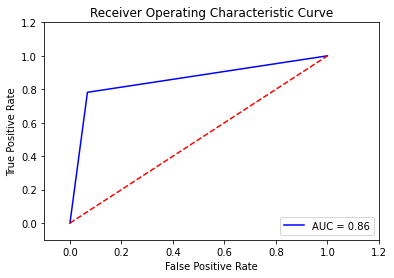

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
